In [3]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df = pd.read_csv('Forecast3.csv', index_col=[0])
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(df.shape)
print(df.columns)

(36, 10)
Index(['Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 'Brazil',
       'Colombia', 'Ecuador', 'Peru', 'Venezuela(Bol.R)', 'Caribe'],
      dtype='object')


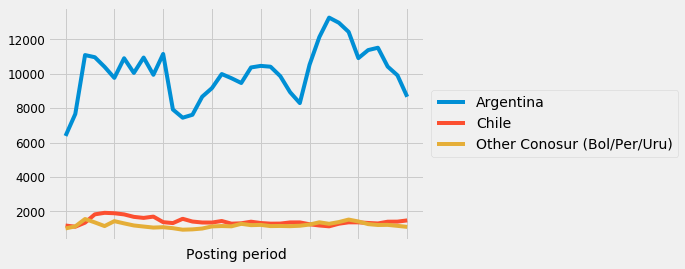

In [8]:
conosur = df[['Argentina', 'Chile','Other Conosur (Bol/Per/Uru)']]
conosur.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

          Colombia      Ecuador         Peru  Venezuela(Bol.R)
count    36.000000    36.000000    36.000000         36.000000
mean   5119.655376  2798.527734  1567.194152        308.852651
std    1347.831280   750.599217   574.645731       1558.656280
min     914.032217   744.999991   654.000002      -7490.000002
25%    4591.769824  2398.499997  1311.298249         78.250002
50%    5139.343838  2763.499982  1542.500014        127.000005
75%    5934.678826  3122.999997  1790.000008        467.686503
max    8193.543155  4763.000685  3534.937167       3058.999994


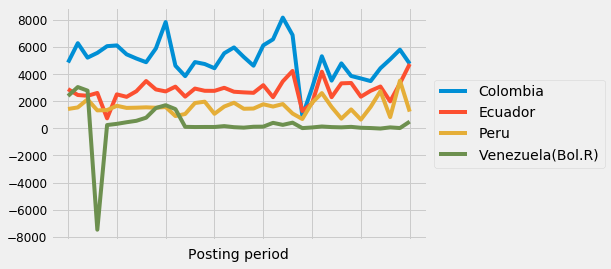

In [10]:
andean = df[['Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)']]
#print(andean)
print(andean.describe())
andean.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

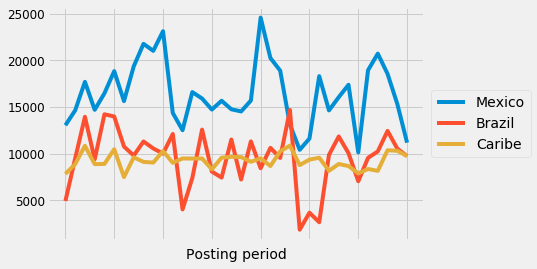

In [14]:
mexico = df['Mexico']
brazil = df['Brazil']
caribe = df['Caribe']
mexico.plot(legend=True)
brazil.plot(legend=True)
caribe.plot(legend=True)
latam = df[['Mexico', 'Argentina', 'Chile',
       'Other Conosur (Bol/Per/Uru)', 'Brazil', 'Colombia', 'Ecuador', 'Peru',
       'Venezuela(Bol.R)', 'Caribe']]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Data Preprocessing


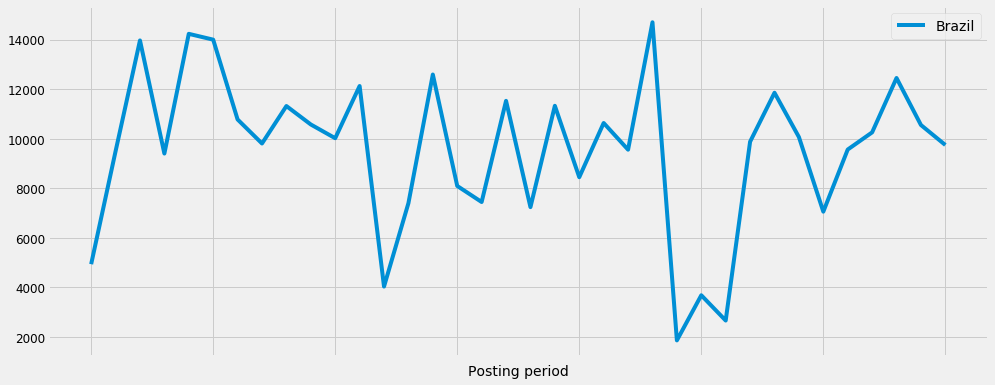

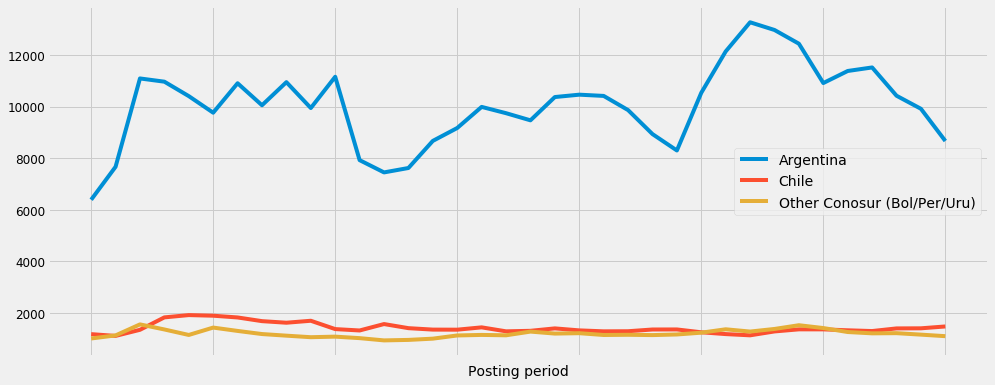

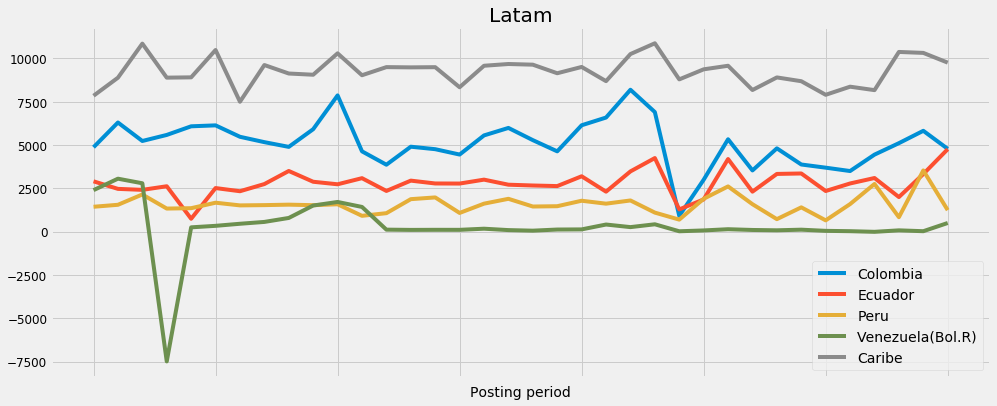

In [13]:
brazil.plot(figsize =(15, 6), legend = True)
conosur.plot(figsize =(15, 6), legend = True)
andean.plot (figsize=(15,6), legend = True)
caribe.plot(figsize=(15,6), legend = True)
plt.title('Latam')
plt.show()

# Decomposition

AttributeError: 'NoneType' object has no attribute 'update'

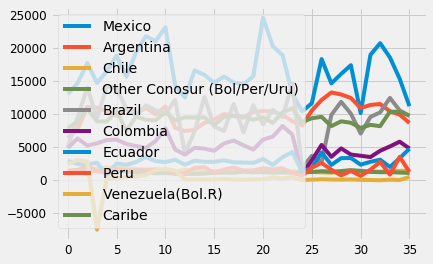

In [16]:
ax = df.plot(xticks=df.index, rot=65, legend=True)
ax.set_xticklabels(df['Posting period'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#y = df['Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 'Brazil', 'Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)', 'Caribe']
#rcParams['figure.figsize'] = 18, 8

#'Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 
#'Brazil', 'Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)', 'Caribe'

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=12)
print(type(decomposition))

#ax = decomposition.plot(xticks=df.index, rot=65, legend=True)
#ax.set_xticklabels(df['Posting period'])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



